<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/train_set/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch import functional as F
import torchvision
from d2l import torch as d2l
from torch.autograd import Variable
from matplotlib import pyplot as plt

In [ ]:
train_data = torchvision.datasets.MNIST(
    root = 'MNIST',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download=False
)
test_data = torchvision.datasets.MNIST(
    root = 'MNIST',
    train = False,
    transform = torchvision.transforms.ToTensor(),
    download=False
)

In [ ]:
train_iter = torch.utils.data.DataLoader(dataset=train_data,batch_size=50,shuffle=True)
test_iter = torch.utils.data.DataLoader(dataset=test_data,batch_size=50,shuffle=True)
images,lables = next(iter(train_iter))

In [ ]:
def get_labele(lables):
    text_lables = ['0','1','2','3','4','5','6','7','8','9']
    return [text_lables[int(i)] for i in lables] 

torch.Size([50, 1, 28, 28])
torch.Size([50, 28, 28, 1])


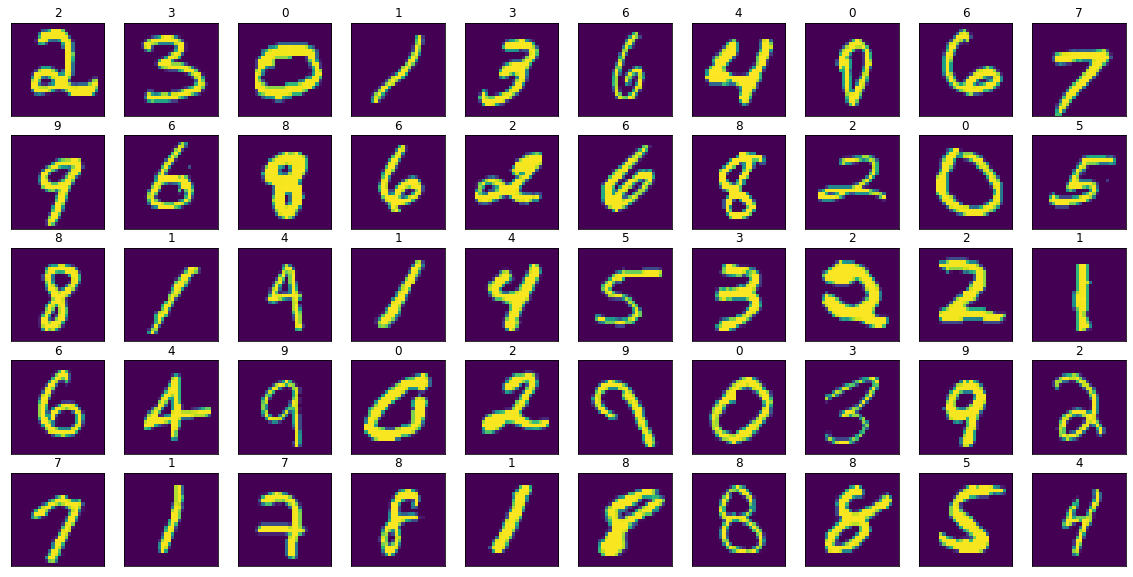

In [ ]:
print(images.shape)
#img = torchvision.utils.make_grid(images,nrow = 10,padding=10)#将若干图片拼接在一起
#print(img.shape)
#img = img.numpy().transpose(1,2,0)
#print(img.shape)
#plt.imshow(img);
img2 = images.permute(0,2,3,1)
print(img2.shape)
d2l.show_images(img2,5,10,titles=get_labele(lables),scale=2);#用d2l显示图片

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1,64,kernel_size=3,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(64,128,kernel_size=3,padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2,2))
        self.fc = nn.Sequential(nn.Linear(14*14*128,1024),
                               nn.ReLU(),
                               nn.Dropout(p=0.5),
                               nn.Linear(1024,10))
    def forward(self,X):
        X = self.conv1(X)
        X = X.view(-1,14*14*128)
        X = self.fc(X)
        return X

In [ ]:
device = torch.device('cuda')
net = Net().to(device)
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

In [ ]:
epochs = 10
for epoch in range(epochs):
    sum_loss = 0.0
    train_correct = 0
    for data in train_iter:
        inputs,lables = data
        inputs,lables = Variable(inputs).cuda(),Variable(lables).cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = cost(outputs,lables)
        loss.backward()
        optimizer.step()
        
        _,id = torch.max(outputs.data,1)
        sum_loss += loss.data
        train_correct += torch.sum(id == lables.data)
    print('[%d,%d] loss:%.03f' % (epoch + 1, epochs, sum_loss / len(train_iter)))
    print('        correct:%.03f%%' % (100 * train_correct / len(train_data)))

[1,10] loss:0.004
        correct:99.863%
[2,10] loss:0.004
        correct:99.878%
[3,10] loss:0.007
        correct:99.767%
[4,10] loss:0.003
        correct:99.907%
[5,10] loss:0.005
        correct:99.845%
[6,10] loss:0.005
        correct:99.860%
[7,10] loss:0.003
        correct:99.888%
[8,10] loss:0.003
        correct:99.890%
[9,10] loss:0.002
        correct:99.942%
[10,10] loss:0.005
        correct:99.863%


In [ ]:
net.eval()
test_correct = 0
for data in test_iter:
    inputs,lables = data
    inputs,lables = Variable(inputs).cuda(),Variable(lables).cuda()
    outputs = net(inputs)
    _,id = torch.max(outputs.data,1)
    test_correct += torch.sum(id == lables.data)
print("correct:%.3f%%" % (100 * test_correct / len(test_data)))

correct:99.080%
